In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px;

In [2]:
# Her kod bitiminde plt.show() kullanmamak için import işlemlerimin ardından bu işlemi de gerçekleştirdim
%matplotlib inline

In [3]:
data = pd.read_csv("data.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Eksik veri olup olmadığını kontrol ettik.
data.isnull().sum()

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
CustomerID     138727
Country          6035
dtype: int64

In [7]:
# Eksik verileri 0 değeri ile doldurduk. Emin olmak için tekrar kontrol ettik.
data = data.fillna(0)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Text(0, 0.5, 'Product Description')

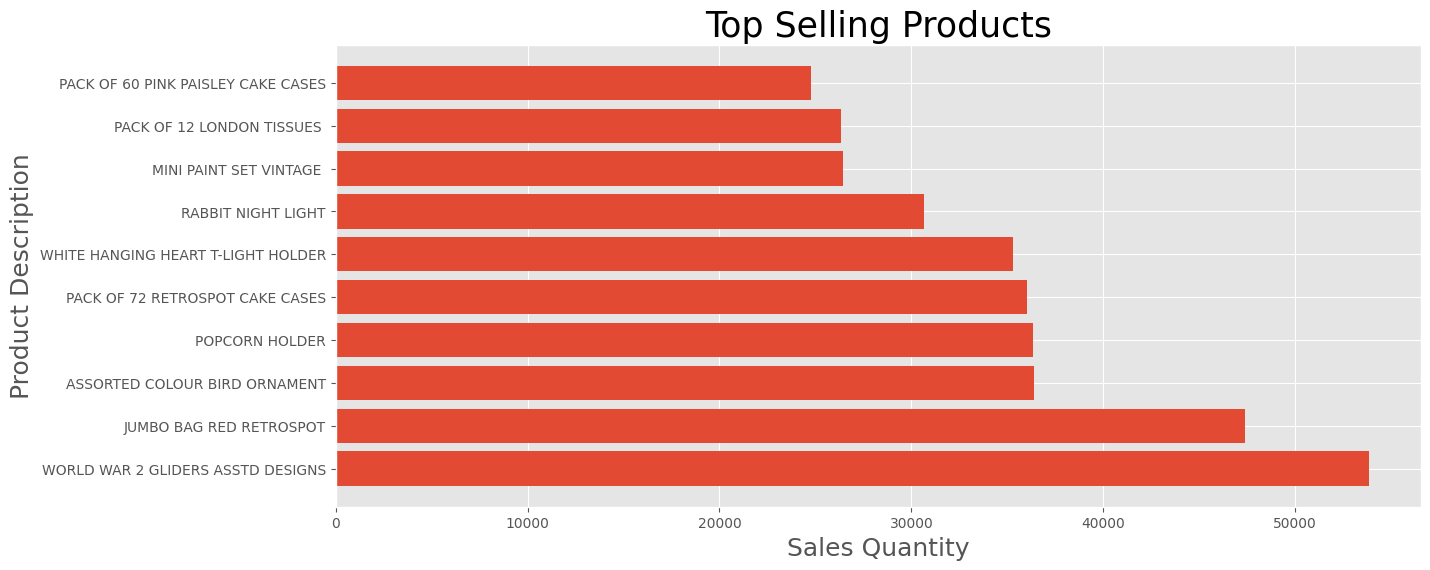

In [8]:
# Ürünlerin yazılı olduğu sütun olan Description sütununu groupby metodu ile aldık.
# Ardından satılan miktarları ürünlerle ilişkilendirerek toplam değerini alıp, ascending=false ekleyerek çoktan aza doğru sıraladık.
# head(10) ile ilk 10 ürünü ele almak istedim.
best_selling = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Yatay çubuk grafiği oluşturmak istediğimiz için barh metodunu kullandım.
# Yatay grafik olduğu için virgülün sol tarafı bize y eksenini verecek. Ürün isimleri karışık gözükmemesi için ilk olarak indexi aldım.
# X eksenine de sayılar daha rahat gözükeceği için satış miktarlarını aldım
plt.figure(figsize=(14,6))
plt.style.use("ggplot")
plt.barh(best_selling.index, best_selling.values)
plt.title('Top Selling Products', fontsize=25)
plt.xlabel('Sales Quantity', fontsize=18)
plt.ylabel('Product Description', fontsize=18)

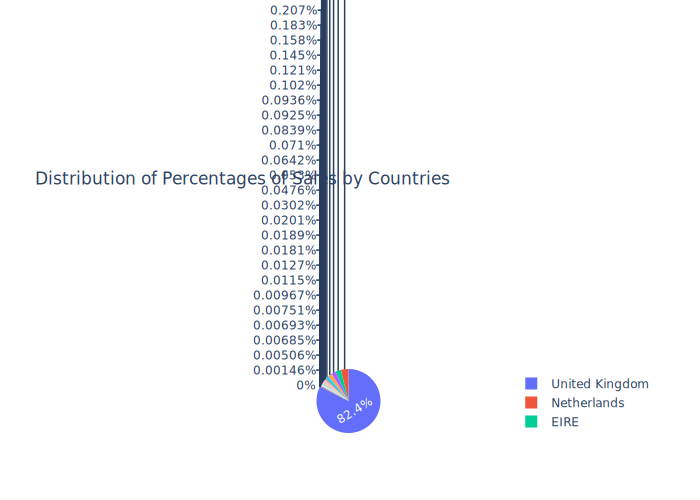

In [9]:
countrySales = data.groupby('Country')['Quantity'].sum().reset_index() # Ülkere göre satışları bulabilmek için groupby metodu ile ülkeleri gruplandırdım. Ardından satılan miktarı ülkelerle ilişkilendirip toplam değeri aldım.
countrySales['Percentage'] = (countrySales['Quantity']/countrySales['Quantity'].sum())*100 # Yüzde hesabımı yaptım

# Ülke isimleri üst üste binmesin diye plotly.express kullanarak pasta grafiği oluşturdum
pieChart = px.pie(countrySales, values='Percentage', names='Country', title='Distribution of Percentages of Sales by Countries')
pieChart.show("svg")

Text(0, 0.5, 'CustomerID')

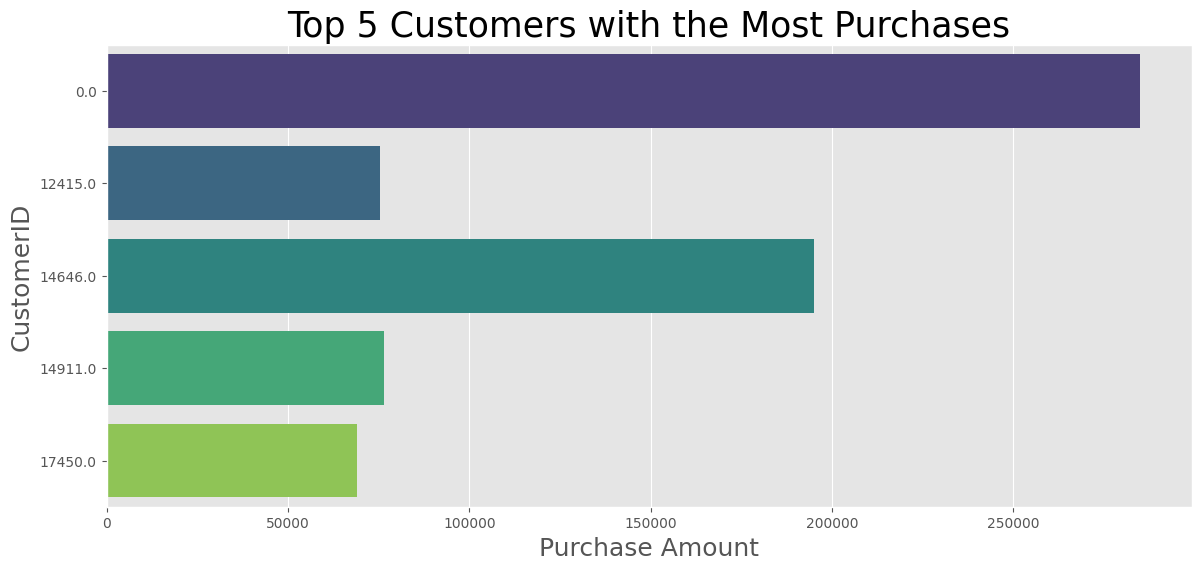

In [10]:
customers = data.groupby(['CustomerID'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False) # Müşterileri gruplandırdım ve ardından satış miktarlarıyla ilişkilendirdim ve bunu çoktan aza doğru sıraladım.
topCustomers = customers.head(5) # İlk beş müşteriyi seçtim

plt.figure(figsize=(14,6))
sns.barplot(x='Quantity', y='CustomerID', data=topCustomers, palette='viridis', orient="h") # Grafiği yatay hale getirmek için orient="h" kullandım
plt.title('Top 5 Customers with the Most Purchases', fontsize=25)
plt.xlabel('Purchase Amount', fontsize=18)
plt.ylabel('CustomerID', fontsize=18)